In [7]:
import matplotlib.axes

from util import *
from read_maze import load_maze, maze_cells, get_local_maze_information
load_maze('mazes/final.npy')

walls = maze_cells[:,:,0]

In [8]:
def plot_maze_walls(walls, show_values=False, ax=None) -> None:
    if ax is None:
        ax = plt.gca() # get current axis

    # display walls
    wall_color = '#eeeeee'
    path_color = '#111111'
    cmap = ListedColormap([wall_color, path_color])
    ax.matshow(walls, cmap=cmap)

    # if show_values:
    for (row, col), value in np.ndenumerate(walls):
        if show_values:
            ax.text(col, row, '{:1d}'.format(value), ha='center', va='center', bbox=dict(boxstyle='round', edgecolor='none', facecolor=wall_color))

In [9]:
def plot_agent(position, ax=None):
    if ax is None:
        ax = plt.gca() # get current axis

    agent = plt.Circle(position, 0.2, color='blue')
    ax.add_patch(agent)

    range = plt.Rectangle((position[0]-1.5,position[1]-1.5), 3, 3, ec="blue", facecolor='none')
    ax.add_patch(range)

    # todo - add t label option

In [10]:
def plot_fires(agent_position: tuple, agent_observation, ax=None):
    if ax is None:
        ax = plt.gca() # get current axis

    walls, fires = agent_observation[:,:,0], agent_observation[:,:,1]

     # if show_values:
    for (row, col), value in np.ndenumerate(walls):
        fire_time = walls[row, col]

        if fire_time == 0 or (col, row) == agent_position:
            pass # do nothing
        else:
            if fire_time == 1:
                fire_color = 'orange'
            elif fire_time == 2:
                fire_color = 'red'

            # todo - draw
            ax.text(col, row,
                    '{:1d}'.format(fires[row, col]),
                    ha='center', va='center',
                    size='x-large',
                    bbox=dict(
                        boxstyle='square',
                        edgecolor='none',
                        facecolor=fire_color,
                        alpha=0.5)
                    )

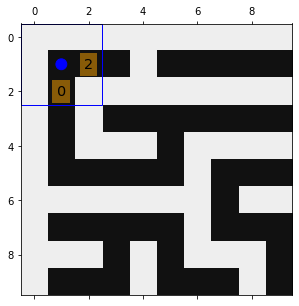

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Example of graphing (n x n) cells from matrix of walls
n = 10 # full size
frame_size = 5

fig, ax = plt.subplots(figsize=(frame_size, frame_size))

plot_maze_walls(maze_cells[:n, :n, 0], show_values=False, ax=ax)

# agent position:
a0 = (1,1)
plot_agent(a0)

o0 = get_local_maze_information(*a0)
plot_fires(a0, o0, ax)

# a1 = (3,3)
# # agent = (5,5)
# plot_agent(a1)
#
# o1 = get_local_maze_information(*a1)
# plot_fires(a1, o1, ax)

# todo - plot player position (absolute player xy)

# todo - plot fires (absolute player xy, relative matrix fires)

In [12]:
# print(walls_to_text(maze_cells[:n,:n,0], nrows=n, ncols=n))
# print(maze_cells[:n,:n,0])

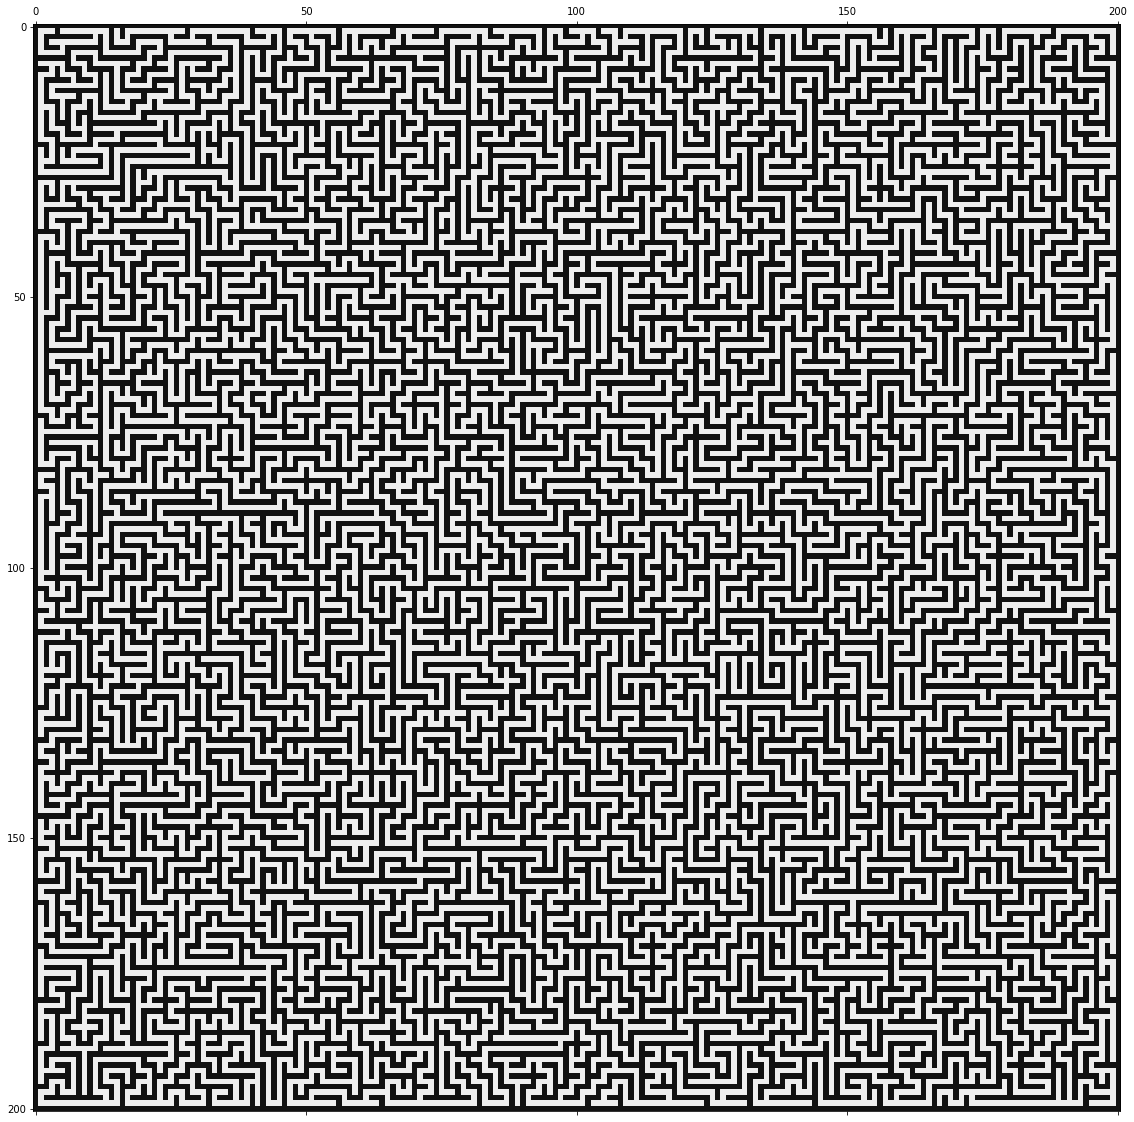

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_maze_walls(1-maze_cells[:, :, 0], show_values=False, ax=ax)